# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# API key from openweathermap
api_key = api_keys.api_key

# API url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [5]:
# generate empty lists to populate with API calls 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Call counter
record = 1

# print statement 
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#for loop for all the cities 
for city in cities:  
    
    # try statement to create exceptions 
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # increment counter
        record= record + 1
        
        # create time delay to not excede API rate
        time.sleep(1.01)
        
    # print exception statement 
    except:
        print("City not found. Skipping...")
    continue
    



Beginning Data Retrieval
-------------------------------
Processing Record 1 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=ushuaia
Processing Record 2 | Kumbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=kumbo
Processing Record 3 | Nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=nemuro
Processing Record 4 | Belle Glade
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=belle glade
Processing Record 5 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=east london
Processing Record 6 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=castro
City not found. Skipping...
Processing Record 7 | Zhanaozen
http://api.openweathermap.org

Processing Record 56 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=kavieng
Processing Record 57 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=tuktoyaktuk
Processing Record 58 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=tasiilaq
Processing Record 59 | Lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=lompoc
Processing Record 60 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=pevek
Processing Record 61 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=mataura
Processing Record 62 | Weihe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=weihe
Proces

Processing Record 113 | Broken Hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=broken hill
Processing Record 114 | Forecariah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=forecariah
Processing Record 115 | High Rock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=high rock
City not found. Skipping...
Processing Record 116 | Chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=chicama
Processing Record 117 | Novo Oriente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=novo oriente
Processing Record 118 | Hohhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=hohhot
Processing Record 119 | Progreso
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing Record 168 | Umm Lajj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=umm lajj
Processing Record 169 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=coquimbo
Processing Record 170 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=quatre cocos
Processing Record 171 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=egvekinot
Processing Record 172 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=avarua
Processing Record 173 | North Platte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=north platte
Processing Record 174 | Star
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaa

City not found. Skipping...
Processing Record 224 | Matara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=matara
Processing Record 225 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=grand gaube
Processing Record 226 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=ixtapa
Processing Record 227 | Warmbad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=warmbad
Processing Record 228 | Acari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=acari
Processing Record 229 | Bouar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=bouar
Processing Record 230 | Ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaec

Processing Record 279 | Man
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=man
Processing Record 280 | Lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=lima
Processing Record 281 | Bantou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=bantou
Processing Record 282 | Athens
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=athens
Processing Record 283 | Bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=bud
Processing Record 284 | Manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=manokwari
Processing Record 285 | Roebourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=roebourne
Processing Record

City not found. Skipping...
Processing Record 335 | Coromandel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=coromandel
Processing Record 336 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=torbay
Processing Record 337 | Moerai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=moerai
Processing Record 338 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=leningradskiy
Processing Record 339 | Mpika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=mpika
Processing Record 340 | Tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=tazovskiy
Processing Record 341 | Filadelfia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 390 | Trojes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=trojes
Processing Record 391 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=lagoa
Processing Record 392 | Ayagoz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=ayagoz
Processing Record 393 | Ribeira Brava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=ribeira brava
Processing Record 394 | Canar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=canar
Processing Record 395 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=faya
Processing Record 396 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=nouadhibou

Processing Record 446 | Gejiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=gejiu
Processing Record 447 | Godfrey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=godfrey
Processing Record 448 | Valdez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=valdez
Processing Record 449 | Darab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=darab
Processing Record 450 | Gobabis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=gobabis
Processing Record 451 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=provideniya
Processing Record 452 | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=kirakira

Processing Record 502 | Quang Ngai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=quang ngai
Processing Record 503 | Bereda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=bereda
Processing Record 504 | Piacabucu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=piacabucu
Processing Record 505 | Sydney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=sydney
Processing Record 506 | Wewak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=wewak
Processing Record 507 | Nardaran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=nardaran
Processing Record 508 | Novikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c566a733b7dabfbaaecae4d90d9800&q=no

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# generate the dictionary
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# make data frame from the dictionary 
weather_data = pd.DataFrame(weatherpy_dict)

# print the counts of each list
weather_data.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

In [8]:
# Save data frame to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1551549600,66,-54.81,-68.31,55.40,8.05
1,Kumbo,100,CM,1551553510,30,6.21,10.69,82.65,5.75
2,Nemuro,0,JP,1551553511,97,43.32,145.57,29.41,12.12
3,Belle Glade,1,US,1551553510,54,26.68,-80.67,88.00,8.05
4,East London,40,ZA,1551549600,68,-33.02,27.91,71.60,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

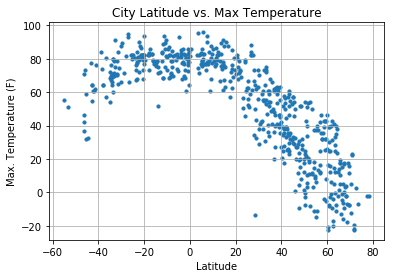

In [10]:
# create statter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# format and label the chart then save
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

#display chart
plt.show()

#### Latitude vs. Humidity Plot

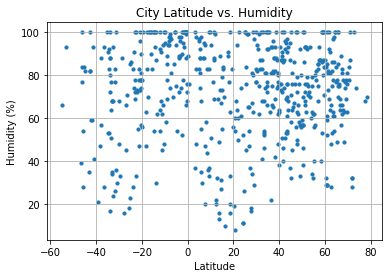

In [11]:

# create another scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# lable chart and save it
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# display chart
plt.show()


#### Latitude vs. Cloudiness Plot

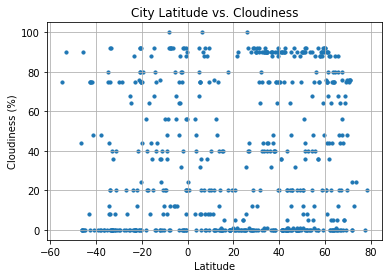

In [12]:

# create the 3rd scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# label chart and save 
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

#display chart
plt.show()

#### Latitude vs. Wind Speed Plot

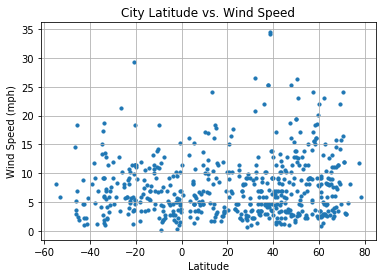

In [13]:

# create final scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# label chart and save
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

#display chart
plt.show()